In [69]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import json 

In [70]:
data = pd.read_csv("../data/raw/demographic_health_data.csv", sep = ",")
pd.set_option('display.max_columns', None)
data.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,Autauga,Alabama,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,Baldwin,Alabama,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13.174712,3076,12.3

In [71]:
print(data.columns.tolist)

<bound method IndexOpsMixin.tolist of Index(['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct',
       '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop',
       '30-39', '30-39 y/o % of total pop',
       ...
       'COPD_number', 'diabetes_prevalence', 'diabetes_Lower 95% CI',
       'diabetes_Upper 95% CI', 'diabetes_number', 'CKD_prevalence',
       'CKD_Lower 95% CI', 'CKD_Upper 95% CI', 'CKD_number',
       'Urban_rural_code'],
      dtype='object', length=108)>


In [72]:
data.info

<bound method DataFrame.info of        fips  TOT_POP    0-9  0-9 y/o % of total pop  19-Oct  \
0      1001    55601   6787               12.206615    7637   
1      1003   218022  24757               11.355276   26913   
2      1005    24881   2732               10.980266    2960   
3      1007    22400   2456               10.964286    2596   
4      1009    57840   7095               12.266598    7570   
...     ...      ...    ...                     ...     ...   
3135  56037    43051   6104               14.178532    6326   
3136  56039    23081   2384               10.328842    2185   
3137  56041    20299   3121               15.375142    3205   
3138  56043     7885    858               10.881420    1113   
3139  56045     6967    780               11.195637     779   

      10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  \
0                    13.735364   6878                 12.370281   7089   
1                    12.344167  23579                 10.814964

In [73]:
columns_with_nan = data.columns[data.isna().any()].tolist()
print(f"Hay {len(columns_with_nan)} columnas con valores nulos")

### Valorar ###
# if len(columns_with_nan) > 0:
#     data.fillna(data.mean())

Hay 0 columnas con valores nulos


In [74]:
target = ["anycondition_number"]
categoric_var = [c for c in list(data.dtypes[data.dtypes == "object"].index)]
numeric_var = [c for c in list(data.dtypes[data.dtypes != "object"].index)]

In [75]:
data.shape

(3140, 108)

In [76]:
duplicados = data[data.duplicated()]
data = data.drop_duplicates().reset_index(drop = True)
 
print(f"Medidas del dataset despues de duplicar filas iguales: {data.shape}")
print("Fila duplicada:")
print(duplicados)

Medidas del dataset despues de duplicar filas iguales: (3140, 108)
Fila duplicada:
Empty DataFrame
Columns: [fips, TOT_POP, 0-9, 0-9 y/o % of total pop, 19-Oct, 10-19 y/o % of total pop, 20-29, 20-29 y/o % of total pop, 30-39, 30-39 y/o % of total pop, 40-49, 40-49 y/o % of total pop, 50-59, 50-59 y/o % of total pop, 60-69, 60-69 y/o % of total pop, 70-79, 70-79 y/o % of total pop, 80+, 80+ y/o % of total pop, White-alone pop, % White-alone, Black-alone pop, % Black-alone, Native American/American Indian-alone pop, % NA/AI-alone, Asian-alone pop, % Asian-alone, Hawaiian/Pacific Islander-alone pop, % Hawaiian/PI-alone, Two or more races pop, % Two or more races, POP_ESTIMATE_2018, N_POP_CHG_2018, GQ_ESTIMATES_2018, R_birth_2018, R_death_2018, R_NATURAL_INC_2018, R_INTERNATIONAL_MIG_2018, R_DOMESTIC_MIG_2018, R_NET_MIG_2018, Less than a high school diploma 2014-18, High school diploma only 2014-18, Some college or associate's degree 2014-18, Bachelor's degree or higher 2014-18, Percent o

In [77]:
## ELIMINAR VARIABLES CON VALORES PORCENTUALES

columns_to_drop = []

for column in data.columns:
    if ('%' in column or 'Percent' in column or 'rate' in column or column.startswith('PCT')):
        columns_to_drop.append(column)

data.drop(columns=columns_to_drop, inplace=True)

print("Columnas eliminadas:", columns_to_drop)
print(data.shape)
data

Columnas eliminadas: ['0-9 y/o % of total pop', '10-19 y/o % of total pop', '20-29 y/o % of total pop', '30-39 y/o % of total pop', '40-49 y/o % of total pop', '50-59 y/o % of total pop', '60-69 y/o % of total pop', '70-79 y/o % of total pop', '80+ y/o % of total pop', '% White-alone', '% Black-alone', '% NA/AI-alone', '% Asian-alone', '% Hawaiian/PI-alone', '% Two or more races', 'Percent of adults with less than a high school diploma 2014-18', 'Percent of adults with a high school diploma only 2014-18', "Percent of adults completing some college or associate's degree 2014-18", "Percent of adults with a bachelor's degree or higher 2014-18", 'PCTPOVALL_2018', 'PCTPOV017_2018', 'PCTPOV517_2018', 'Unemployment_rate_2018', 'Med_HH_Income_Percent_of_State_Total_2018', 'Percent of Population Aged 60+', 'anycondition_Lower 95% CI', 'anycondition_Upper 95% CI', 'Obesity_Lower 95% CI', 'Obesity_Upper 95% CI', 'Heart disease_Lower 95% CI', 'Heart disease_Upper 95% CI', 'COPD_Lower 95% CI', 'COP

,fips,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,White-alone pop,Black-alone pop,Native American/American Indian-alone pop,Asian-alone pop,Hawaiian/Pacific Islander-alone pop,Two or more races pop,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,POVALL_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Median_Household_Income_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_number,Obesity_prevalence,Obesity_number,Heart disease_prevalence,Heart disease_number,COPD_prevalence,COPD_number,diabetes_prevalence,diabetes_number,CKD_prevalence,CKD_number,Urban_rural_code
0,1001,55601,6787,7637,6878,7089,7582,7738,5826,4050,2014,42660,10915,267,681,62,1016,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,7587,59338,53628,65048,25957,25015,942,59338,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,Autauga,Alabama,1,1,42438,47.6,20181,35.8,15193,7.9,3345,8.6,3644,12.9,5462,3.1,1326,3
1,1003,218022,24757,26913,23579,25213,27338,29986,29932,20936,9368,190301,19492,1684,2508,146,3891,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,21069,57588,54437,60739,93849,90456,3393,57588,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,Baldwin,Alabama,1,3,170912,40.2,68790,29.7,50761,7.8,13414,8.6,14692,12.0,20520,3.2,5479,4
2,1005,24881,2732,2960,3268,3201,3074,3278,3076,2244,1048,12209,12042,164,113,46,307,24881,-277,2820,10.4,12.9,-2.5,0.5,-9.1,-8.6,4901,6486,4566,2220,6788,34382,31157,37607,8373,7940,433,34382,217.1,196.7,77.2,71.2,7.6,6.9,12.914231,2.723340,0.514126,11.631462,9.508784,32.283033,5,26201,6150,Barbour,Alabama,1,5,19689,57.5,11325,40.7,8013,11.0,2159,12.1,2373,19.7,3870,4.5,887,6
3,1007,22400,2456,2596,3029,3113,3038,3115,2545,1723,785,17211,4770,98,53,26,242,22400,-155,2151,11.1,11.4,-0.3,0.4,-7.0,-6.6,2650,7471,3846,1813,4400,46064,41283,50845,8661,8317,344,46064,217.1,196.7,77.2,71.2,7.6,6.9,11.626493,2.451783,0.462860,10.471635,8.560619,29.063942,0,22580,4773,Bibb,Alabama,1,7,17813,51.6,9190,38.7,6894,8.6,1533,10.0,1789,14.1,2511,3.3,595,2
4,1009,57840,7095,7570,6742,6884,7474,7844,6965,4931,2335,55456,950,378,185,70,801,57840,13,489,11.8,11.4,0.3,0.1,-0.2,0.0,7861,13489,13267,5010,7527,50412,46157,54667,25006,24128,878,50412,217.1,196.7,77.2,71.2,7.6,6.9,30.021267,6.330854,1.195171,27.039257,22.104740,75.047251,6,57667,13600,Blount,Alabama,1,9,44448,46.3,20584,34.0,15112,9.2,4101,10.5,4661,13.5,6017,3.4,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,6326,5359,6577,5334,5261,4943,2198,949,40397,592,665,435,68,894,43051,-496,660,12.6,7.0,5.6,1.4,-18.5,-17.2,2549,9433,10108,6243,3540,73315,

In [78]:
# Factorizar columnas categoricas

def automatizar_factorizacion(df, columnas):
    transformacion_reglas = {}
    col_factorizadas = []
    
    # Iterar sobre las columnas especificadas para la factorización
    for col in columnas:
        # Aplicar la factorización y reemplazar la columna original con la columna factorizada
        df[f"{col}_n"] = pd.factorize(df[col])[0]
        
        # Guardar las reglas de transformación para la columna actual en el diccionario
        transformacion_reglas[col] = {row[col]: row[f"{col}_n"] for _, row in df[[col, f"{col}_n"]].drop_duplicates().iterrows()}
        
        # Reemplazar la columna original por la columna factorizada
        df[col] = df[f"{col}_n"]
        
        # Agregar el nombre de la columna factorizada a la lista
        col_factorizadas.append(col)  # Ya no agregamos `f"{col}_n"` ya que reemplazamos la columna original

        # Eliminar la columna auxiliar que contiene los números factorized (ya que la hemos reemplazado)
        df.drop(columns=[f"{col}_n"], inplace=True)
    
    # Guardar el diccionario de reglas en un archivo JSON
    with open("../models/transformacion_reglas_categoricas.json", "w") as f:
        json.dump(transformacion_reglas, f)
    
    print("Factorización completada y reglas guardadas en 'transformacion_reglas_categoricas.json'.")
    
    # Retornar el DataFrame actualizado con las columnas reemplazadas y la lista de columnas factorizadas
    return df, col_factorizadas

# Llamar a la función para automatizar la factorización
data, col_factorizadas = automatizar_factorizacion(data, categoric_var) ### VARIABLES A FACTRIZAR 

# Imprimir las columnas que han sido factorizadas
print("Columnas factorizadas:", col_factorizadas)


Factorización completada y reglas guardadas en 'transformacion_reglas_categoricas.json'.
Columnas factorizadas: ['COUNTY_NAME', 'STATE_NAME']


----

NUMERICAL ANALYSIS

CATEGORICAL ANALYSIS 

NUMERIC - NUMERIC

CATEGORIC - CATEGORIC 

CORRELATION ANALYSIS 

In [79]:
data

,fips,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,White-alone pop,Black-alone pop,Native American/American Indian-alone pop,Asian-alone pop,Hawaiian/Pacific Islander-alone pop,Two or more races pop,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,POVALL_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Median_Household_Income_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_number,Obesity_prevalence,Obesity_number,Heart disease_prevalence,Heart disease_number,COPD_prevalence,COPD_number,diabetes_prevalence,diabetes_number,CKD_prevalence,CKD_number,Urban_rural_code
0,1001,55601,6787,7637,6878,7089,7582,7738,5826,4050,2014,42660,10915,267,681,62,1016,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,7587,59338,53628,65048,25957,25015,942,59338,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,0,0,1,1,42438,47.6,20181,35.8,15193,7.9,3345,8.6,3644,12.9,5462,3.1,1326,3
1,1003,218022,24757,26913,23579,25213,27338,29986,29932,20936,9368,190301,19492,1684,2508,146,3891,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,21069,57588,54437,60739,93849,90456,3393,57588,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,1,0,1,3,170912,40.2,68790,29.7,50761,7.8,13414,8.6,14692,12.0,20520,3.2,5479,4
2,1005,24881,2732,2960,3268,3201,3074,3278,3076,2244,1048,12209,12042,164,113,46,307,24881,-277,2820,10.4,12.9,-2.5,0.5,-9.1,-8.6,4901,6486,4566,2220,6788,34382,31157,37607,8373,7940,433,34382,217.1,196.7,77.2,71.2,7.6,6.9,12.914231,2.723340,0.514126,11.631462,9.508784,32.283033,5,26201,6150,2,0,1,5,19689,57.5,11325,40.7,8013,11.0,2159,12.1,2373,19.7,3870,4.5,887,6
3,1007,22400,2456,2596,3029,3113,3038,3115,2545,1723,785,17211,4770,98,53,26,242,22400,-155,2151,11.1,11.4,-0.3,0.4,-7.0,-6.6,2650,7471,3846,1813,4400,46064,41283,50845,8661,8317,344,46064,217.1,196.7,77.2,71.2,7.6,6.9,11.626493,2.451783,0.462860,10.471635,8.560619,29.063942,0,22580,4773,3,0,1,7,17813,51.6,9190,38.7,6894,8.6,1533,10.0,1789,14.1,2511,3.3,595,2
4,1009,57840,7095,7570,6742,6884,7474,7844,6965,4931,2335,55456,950,378,185,70,801,57840,13,489,11.8,11.4,0.3,0.1,-0.2,0.0,7861,13489,13267,5010,7527,50412,46157,54667,25006,24128,878,50412,217.1,196.7,77.2,71.2,7.6,6.9,30.021267,6.330854,1.195171,27.039257,22.104740,75.047251,6,57667,13600,4,0,1,9,44448,46.3,20584,34.0,15112,9.2,4101,10.5,4661,13.5,6017,3.4,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,6326,5359,6577,5334,5261,4943,2198,949,40397,592,665,435,68,894,43051,-496,660,12.6,7.0,5.6,1.4,-18.5,-17.2,2549,9433,10108,6243,3540,73315,67141,79489,21150,20254,896,73315,207.9,199.6,79.8,76.2,

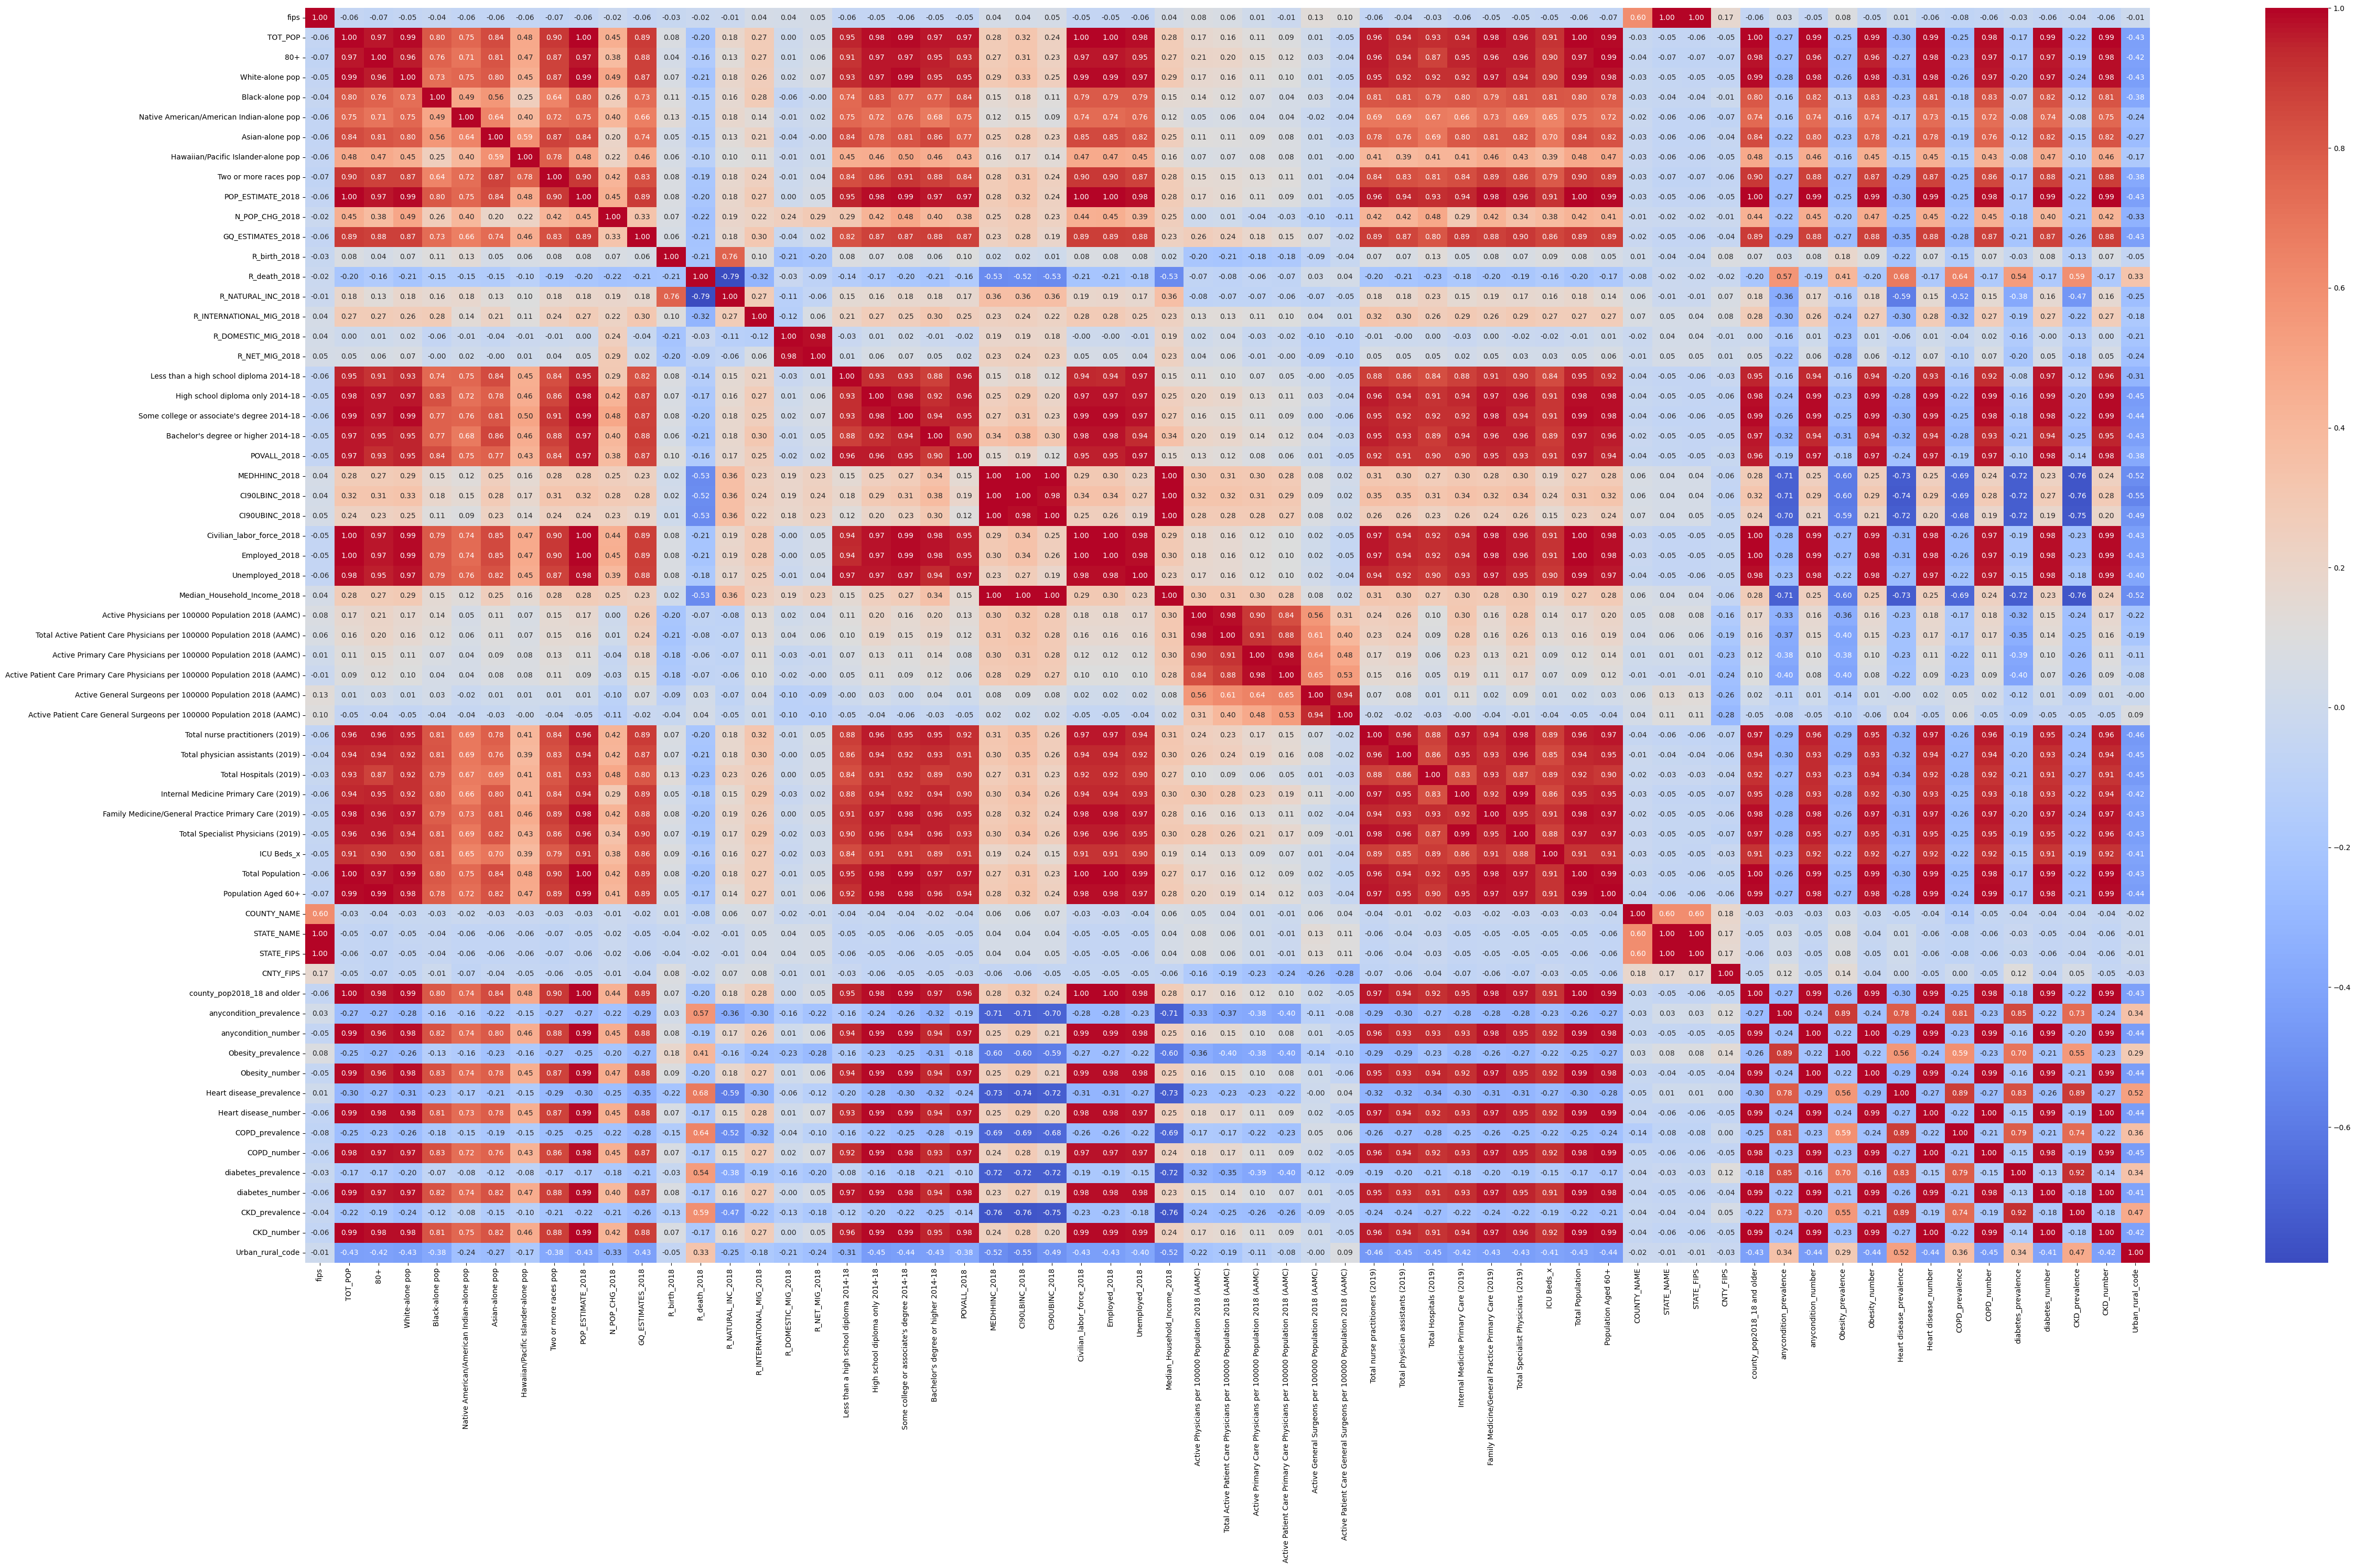

In [80]:
columns_to_exclude = data.columns[2:10].tolist()  # Especifica las columnas a excluir
data_filtered = data.drop(columns=columns_to_exclude)

fig, axis = plt.subplots(figsize=(50, 30))

sns.heatmap(data_filtered.corr(), annot=True, fmt=".2f", cmap="coolwarm")

plt.tight_layout()
plt.show()

OUTLAIER ANALYSIS 

In [81]:
# Columnas con outlaiers 

columns_with_outliers = []

# Iterar sobre las columnas numéricas del DataFrame
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    # Calcular los cuartiles y el IQR para cada columna
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calcular los límites inferiores y superiores para detectar outliers
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Detectar los outliers (valores fuera de los límites)
    outliers = data[(data[column] < lower_limit) | (data[column] > upper_limit)]
    
    # Si hay outliers, agregar el nombre de la columna a la lista
    if not outliers.empty:
        columns_with_outliers.append(column)

# Mostrar las columnas que contienen outliers
print("Columnas con outliers:", columns_with_outliers)

Columnas con outliers: ['TOT_POP', '0-9', '19-Oct', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+', 'White-alone pop', 'Black-alone pop', 'Native American/American Indian-alone pop', 'Asian-alone pop', 'Hawaiian/Pacific Islander-alone pop', 'Two or more races pop', 'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018', 'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018', 'Less than a high school diploma 2014-18', 'High school diploma only 2014-18', "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18", 'POVALL_2018', 'MEDHHINC_2018', 'CI90LBINC_2018', 'CI90UBINC_2018', 'Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018', 'Median_Household_Income_2018', 'Active Physicians per 100000 Population 2018 (AAMC)', 'Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)', 'Active Primary Care Physicians per 100000 Population 2018 (AAMC)', 'Active Pati

OUTLAIER REPLACEMENT

In [82]:
data_sin_outliers = data.copy()

col_con_outliers = columns_with_outliers

def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = min(df[column])
  # Remove upper outliers
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  # Remove lower outliers
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return df.copy(), [lower_limit, upper_limit]

outliers_dict = {}
for column in col_con_outliers:
  data_sin_outliers, limits_list = replace_outliers_from_column(column, data_sin_outliers)
  outliers_dict[column] = limits_list

with open("../models/outliers_replacement.json", "w") as f:
  json.dump(outliers_dict, f)

outliers_dict

{'TOT_POP': [88, np.float64(153337.625)],
 '0-9': [0, np.float64(18321.75)],
 '19-Oct': [0, np.float64(19993.875)],
 '20-29': [0, np.float64(20545.0)],
 '30-39': [11, np.float64(18936.5)],
 '40-49': [4, np.float64(18433.375)],
 '50-59': [14, np.float64(20668.625)],
 '60-69': [20, np.float64(19561.5)],
 '70-79': [6, np.float64(12508.875)],
 '80+': [0, np.float64(6449.875)],
 'White-alone pop': [24, np.float64(133951.25)],
 'Black-alone pop': [0, np.float64(14199.5)],
 'Native American/American Indian-alone pop': [0, np.float64(1555.5)],
 'Asian-alone pop': [0, np.float64(2080.125)],
 'Hawaiian/Pacific Islander-alone pop': [0, np.float64(165.0)],
 'Two or more races pop': [0, np.float64(3472.5)],
 'POP_ESTIMATE_2018': [88, np.float64(153337.625)],
 'N_POP_CHG_2018': [-24009, np.float64(868.25)],
 'GQ_ESTIMATES_2018': [0, np.float64(5349.75)],
 'R_birth_2018': [np.float64(5.649999999999998),
  np.float64(16.450000000000003)],
 'R_death_2018': [np.float64(3.4499999999999993), np.float64(17

SPLIT

In [83]:
from sklearn.model_selection import train_test_split

# Separar características (X) y la variable objetivo (target)
X = data.drop(target, axis=1)  # Aquí 'target' es el nombre de la columna objetivo
y = data[target]

# Dividir el conjunto de datos en entrenamiento (80%) y prueba (20%)
num_variables = data.copy().drop(target, axis= 1).columns.tolist()

# Dividimos el conjunto de datos en muestras de train y test
X_con_outliers = data.drop(target, axis = 1)[num_variables]
X_sin_outliers = data_sin_outliers.drop(target, axis = 1)[num_variables]
y = data[target]

X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_con_outliers, y, test_size = 0.2, random_state = 42)
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_sin_outliers, test_size = 0.2, random_state = 42)

# GUARDAR LOS DATASETS
X_train_con_outliers.to_csv("../data/processed/X_train_con_outliers.csv", index = False)
X_train_sin_outliers.to_csv("../data/processed/X_train_sin_outliers.csv", index = False)
X_test_con_outliers.to_csv("../data/processed/X_test_con_outliers.csv", index = False)
X_test_sin_outliers.to_csv("../data/processed/X_test_sin_outliers.csv", index = False)
y_train.to_csv("../data/processed/y_train.csv", index = False)
y_test.to_csv("../data/processed/y_test.csv", index = False)

ESCALADO

In [84]:
from sklearn.preprocessing import StandardScaler
import pickle

### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
normalizador_con_outliers = StandardScaler()
normalizador_con_outliers.fit(X_train_con_outliers)

with open("../models/normalizador_con_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_con_outliers, file)

X_train_con_outliers_norm = normalizador_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_norm = normalizador_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index = X_test_con_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_con_outliers_norm.to_csv("../data/processed/X_train_con_outliers_norm.csv", index = False)
X_test_con_outliers_norm.to_csv("../data/processed/X_test_con_outliers_norm.csv", index = False)

### NORMALIZAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
normalizador_sin_outliers = StandardScaler()
normalizador_sin_outliers.fit(X_train_sin_outliers)

with open("../models/normalizador_sin_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_sin_outliers, file)

X_train_sin_outliers_norm = normalizador_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_norm = normalizador_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index = X_test_sin_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_sin_outliers_norm.to_csv("../data/processed/X_train_sin_outliers_norm.csv", index = False)
X_test_sin_outliers_norm.to_csv("../data/processed/X_test_sin_outliers_norm.csv", index = False)

X_train_con_outliers_norm.head()

,fips,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,White-alone pop,Black-alone pop,Native American/American Indian-alone pop,Asian-alone pop,Hawaiian/Pacific Islander-alone pop,Two or more races pop,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,POVALL_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Median_Household_Income_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,Obesity_prevalence,Obesity_number,Heart disease_prevalence,Heart disease_number,COPD_prevalence,COPD_number,diabetes_prevalence,diabetes_number,CKD_prevalence,CKD_number,Urban_rural_code
1292,-0.301633,-0.229763,-0.225393,-0.231350,-0.229775,-0.223780,-0.228216,-0.227030,-0.231375,-0.232151,-0.231665,-0.227350,-0.229971,-0.167939,-0.138755,-0.108704,-0.213554,-0.229763,-0.146837,-0.332789,0.047698,-0.138376,0.121309,0.185519,0.314540,0.352616,-0.160593,-0.242711,-0.234037,-0.231129,-0.201794,-0.173289,-0.052872,-0.286824,-0.228932,-0.230974,-0.177629,-0.173289,0.745911,0.735968,0.776921,0.715274,0.211338,-0.066614,-0.263175,-0.211771,-0.295176,-0.200241,-0.212795,-0.208077,-0.279417,-0.228413,-0.227824,0.343882,-0.317280,-0.303534,0.211484,-0.230288,0.460434,0.796252,-0.230636,0.866051,-0.224232,0.951061,-0.222477,0.244361,-0.215940,0.644725,-0.216950,0.910528
2302,0.761573,-0.161280,-0.179851,-0.181109,-0.188375,-0.176225,-0.163303,-0.139120,-0.112664,-0.124916,-0.099555,-0.132168,-0.225814,-0.223105,-0.135758,-0.103989,-0.196637,-0.161280,-0.370444,-0.192139,-0.592179,1.034033,-1.053997,-0.520507,-0.647606,-0.752449,-0.127133,-0.020372,-0.183295,-0.192282,-0.131276,-0.504065,-0.411166,-0.588936,-0.174206,-0.175891,-0.132117,-0.504065,1.530197,1.478643,1.013637,0.772171,0.822599,0.372584,-0.164761,-0.074503,-0.204487,-0.106092,-0.123374,-0.117282,-0.190529,-0.153492,-0.106368,1.314203,0.812126,0.761378,0.156293,-0.155864,-0.009886,-0.401264,-0.158219,0.351189,-0.121664,0.350976,-0.117073,0.021661,-0.135257,0.109985,-0.135212,0.249092
761,-0.833037,-0.198764,-0.209983,-0.195009,-0.168470,-0.194740,-0.193726,-0.199360,-0.218215,-0.220562,-0.204552,-0.188513,-0.212142,-0.218609,-0.132317,-0.105703,-0.205012,-0.198764,-0.146220,0.331601,-0.192256,-0.440933,0.171323,-0.238097,0.217443,0.174380,-0.157362,-0.160684,-0.210589,-0.224398,-0.203666,0.138198,0.162499,0.114015,-0.204625,-0.204930,-0.193902,0.138198,-0.569817,-0.450424,-0.603920,-0.536466,-0.858370,-0.593651,-0.216443,-0.269500,-0.215769,-0.221406,-0.193804,-0.216510,-0.212751,-0.196750,-0.215126,-0.676341,-0.881983,-0.835989,0.266675,-0.195032,0.037146,-0.290383,-0.201734,-0.735742,-0.215308,0.050934,-0.194220,-0.312388,-0.188714,-0.959495,-0.204982,-1.735217
2194,0.629287,-0.048115,-0.049041,-0.029705,-0.067671,-0.062335,-0.044847,-0.033104,-0.044844,-0.036279,-0.057310,-0.055730,-0.216364,1.902982,-0.111718,-0.079553,0.397328,-0.048115,-0.042447,-0.204247,-0.232248,-0.478753,0.146316,-0.285165,0.332194,0.281322,-0.105324,0.006970,0.003156,-0.098414,-0.104468,0.649528,0.704697,0.59

NORMALIZADO

In [85]:
from sklearn.preprocessing import MinMaxScaler

### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
scaler_con_outliers = MinMaxScaler()
scaler_con_outliers.fit(X_train_con_outliers)

with open("../models/scaler_con_outliers.pkl", "wb") as file:
  pickle.dump(scaler_con_outliers, file)

X_train_con_outliers_scal = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_scal = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index = X_test_con_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_con_outliers_scal.to_csv("../data/processed/X_train_con_outliers_scal.csv", index = False)
X_test_con_outliers_scal.to_csv("../data/processed/X_test_con_outliers_scal.csv", index = False)

### ESCALAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
scaler_sin_outliers = MinMaxScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

with open("../models/scaler_sin_outliers.pkl", "wb") as file:
  pickle.dump(scaler_sin_outliers, file)

X_train_sin_outliers_scal = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_scal = pd.DataFrame(X_train_sin_outliers_scal, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_scal = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_scal = pd.DataFrame(X_test_sin_outliers_scal, index = X_test_sin_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_sin_outliers_scal.to_csv("../data/processed/X_train_sin_outliers_scal.csv", index = False)
X_test_sin_outliers_scal.to_csv("../data/processed/X_test_sin_outliers_scal.csv", index = False)

X_train_con_outliers_scal.head()

,fips,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,White-alone pop,Black-alone pop,Native American/American Indian-alone pop,Asian-alone pop,Hawaiian/Pacific Islander-alone pop,Two or more races pop,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,POVALL_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Median_Household_Income_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,Obesity_prevalence,Obesity_number,Heart disease_prevalence,Heart disease_number,COPD_prevalence,COPD_number,diabetes_prevalence,diabetes_number,CKD_prevalence,CKD_number,Urban_rural_code
1292,0.456468,0.002626,0.002666,0.002795,0.001877,0.001876,0.002094,0.002923,0.003786,0.004286,0.003391,0.003536,0.000273,0.002947,0.000057,0.000117,0.001427,0.002626,0.229694,0.001699,0.406475,0.456621,0.372038,0.161677,0.499620,0.510266,0.001740,0.004505,0.003185,0.001564,0.002888,0.358835,0.353249,0.364056,0.002425,0.002389,0.003169,0.358835,0.145951,0.168618,0.186353,0.223350,0.116751,0.166667,0.002983,0.004977,0.004167,0.003449,0.004124,0.003594,0.000000,0.002597,0.003994,0.477693,0.44,0.454545,0.150179,0.002584,0.626697,0.674352,0.003768,0.557522,0.004749,0.475610,0.005315,0.395833,0.002953,0.441860,0.003230,1.0
2302,0.747057,0.005064,0.004363,0.004641,0.003299,0.003549,0.004352,0.006027,0.008135,0.008375,0.008218,0.006941,0.000480,0.000750,0.000149,0.000234,0.002072,0.005064,0.222816,0.007301,0.348921,0.598174,0.260664,0.116766,0.416856,0.415970,0.002676,0.013047,0.005041,0.003096,0.005349,0.325975,0.317153,0.334220,0.004365,0.004354,0.004603,0.325975,0.197041,0.221747,0.203555,0.228426,0.157360,0.215686,0.007112,0.011215,0.008671,0.007262,0.007420,0.007129,0.003763,0.005225,0.008457,0.763330,0.76,0.745455,0.143027,0.005206,0.558824,0.518732,0.006525,0.477876,0.008715,0.390244,0.009422,0.364583,0.005676,0.372093,0.006103,0.8
761,0.311228,0.003730,0.003240,0.004130,0.003983,0.002898,0.003294,0.003900,0.004268,0.004728,0.004381,0.004925,0.001161,0.000929,0.000254,0.000191,0.001753,0.003730,0.229713,0.028161,0.384892,0.420091,0.376777,0.134731,0.491268,0.495057,0.001831,0.007656,0.004042,0.001830,0.002823,0.389779,0.374947,0.403642,0.003287,0.003318,0.002656,0.389779,0.060241,0.083746,0.086009,0.111675,0.045685,0.107843,0.004944,0.002354,0.008111,0.002592,0.004824,0.003266,0.002822,0.003708,0.004461,0.177367,0.28,0.309091,0.157330,0.003826,0.565611,0.533141,0.004868,0.309735,0.005094,0.347561,0.006416,0.317708,0.003872,0.232558,0.003651,0.2
2194,0.710901,0.009094,0.009239,0.010205,0.007447,0.007555,0.008474,0.009770,0.010619,0.011755,0.009762,0.009675,0.000951,0.085388,0.000883,0.000840,0.024711,0.009094,0.232905,0.006819,0.381295,0.415525,0.374408,0.131737,0.501139,0.504183,0.003286,0.014098,0.011861,0.006798,0.006284,0.440576,0.429570,0.450863,0.008721,0.008845,0.006184,0.440576,0.023486,0.032193,0.049312,0.061760,0.030457,0.078431,0.006694,0.014851,0.031781,0.005378,0.013571,0.007236,0.002822,0.008908,0.010805,0.733950,0.72,0.709091,0.154946,0.008